# Model Evaluation

## Evaluating the original model

In [ ]:
# Internal imports
import os

# External imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imageai.Classification.Custom import CustomImageClassification
from sklearn.metrics import classification_report



# Path to the brain tumor dataset composed of two sub folders training and testing
DATA_DIR = "./.data/brain_dataset"

# Path to the brain tumor dataset for testing
TRAINING_DATASET = "./.data/brain_dataset/training"

# Path to the brain tumor dataset for testing
TESTING_DATASET = "./.data/brain_dataset/testing"

# Loading imageai class
prediction = CustomImageClassification()
prediction.setModelTypeAsDenseNet121()
prediction.setModelPath(os.getcwd()+"/model.pt")
prediction.setJsonPath("archive_model_classes.json")
prediction.loadModel()

prediction_label = []
prediction_probability = []
true_label = []

for i in ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]:
    for j in os.listdir(TESTING_DATASET+"/"+i):
        pred = prediction.classifyImage(TESTING_DATASET+"/"+i+"/"+j, result_count=1)
        true_label.append(i)
        prediction_label.append(pred[0][0])
        prediction_probability.append(pred[1][0])

df_prediction= pd.DataFrame({"Predicted Label" : prediction_label, 
                       "True Label" : true_label,
                       "Probability" : prediction_probability})

# Confusion Matrix
df_confusion_matrix = pd.crosstab(index=df_prediction["Predicted Label"], columns=df_prediction["True Label"])

display(df_confusion_matrix)


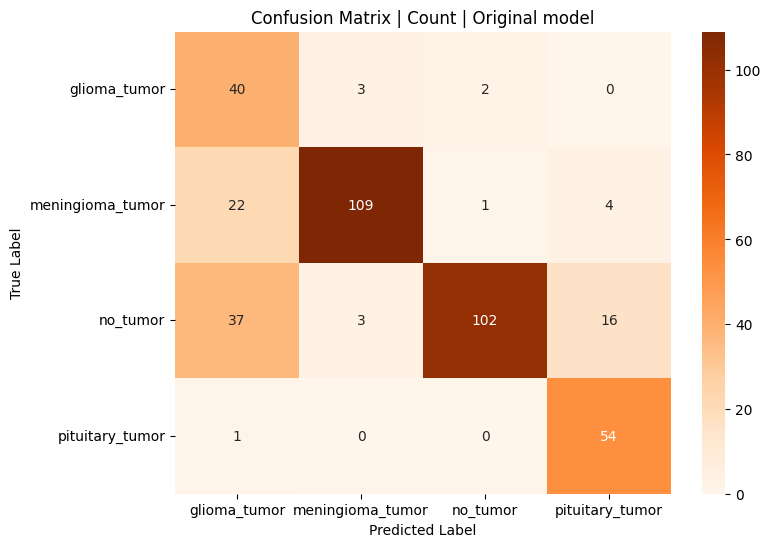

In [2]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix | Count | Original model")
sns.heatmap(df_confusion_matrix, annot=True, fmt="", cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

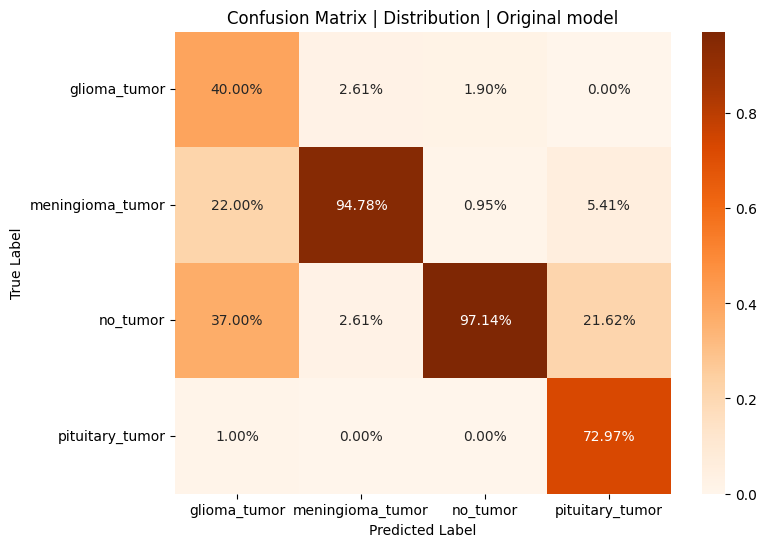

In [3]:
# Getting the distribution in percentages for the confusion matrix
confusion_matrix_distribution = (df_confusion_matrix/np.sum(df_confusion_matrix, axis=0))

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix | Distribution | Original model")
sns.heatmap(confusion_matrix_distribution, annot=True, fmt='.2%', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
# Creating a classification report for the original model
scores = classification_report(df_prediction["True Label"], df_prediction["Predicted Label"], output_dict=True)
df_scores = pd.DataFrame(scores).transpose().round(decimals = 2)

display(df_scores)


,precision,recall,f1-score,support
glioma_tumor,0.89,0.40,0.55,100.00
meningioma_tumor,0.80,0.95,0.87,115.00
no_tumor,0.65,0.97,0.78,105.00
pituitary_tumor,0.98,0.73,0.84,74.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.83,0.76,0.76,394.00
weighted avg,0.82,0.77,0.76,394.00
